In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import datasets

# Load BCB dataset from Hugging Face
dataset = datasets.load_dataset("code_x_glue_cc_clone_detection_big_clone_bench", split="train")

# Select 100 samples (for quick testing)
data = dataset.select(range(100))

# Extract function pairs and labels
X1 = np.array([sample['func1'] for sample in data])  # First function in pair
X2 = np.array([sample['func2'] for sample in data])  # Second function in pair
y = np.array([sample['label'] for sample in data])   # Labels: 1 (Clone), 0 (Not Clone)

print(f"Loaded {len(X1)} function pairs from BCB dataset.")

Loaded 100 function pairs from BCB dataset.


In [3]:
import datasets

# Load full training dataset (all splits)
train_dataset = datasets.load_dataset("code_x_glue_cc_clone_detection_big_clone_bench", split="train")

# Convert to Pandas DataFrame for easier handling
train_df = train_dataset.to_pandas()

# Save to a single CSV file (optional)
train_df.to_csv("bcb_train.csv", index=False)

print(f"Final Train Dataset Size: {train_df.shape}")
print(train_df.head())


Final Train Dataset Size: (901028, 6)
   id       id1       id2                                              func1  \
0   0  13988825   8660836      private void setNodekeyInJsonResponse(Stri...   
1   1     80378  18548122      public static void test(String args[]) {\n...   
2   2  21354223   7421563      public String kodetu(String testusoila) {\...   
3   3  15826299  19728871      public static void printResponseHeaders(St...   
4   4   9938081  11517213      public void load(String fileName) {\n     ...   

                                               func2  label  
0      public void transform(String style, String...  False  
1      private static String loadUrlToString(Stri...   True  
2      private StringBuffer encoder(String arg) {...   True  
3      public static String getEncodedPassword(St...  False  
4      private static void copyFile(File sourceFi...  False  


In [4]:
print(train_df.columns)  # Ensure all expected columns exist
print(train_df.dtypes)   # Check data types
print(train_df.iloc[:5]) # Print first 5 rows clearly

Index(['id', 'id1', 'id2', 'func1', 'func2', 'label'], dtype='object')
id        int32
id1       int32
id2       int32
func1    object
func2    object
label      bool
dtype: object
   id       id1       id2                                              func1  \
0   0  13988825   8660836      private void setNodekeyInJsonResponse(Stri...   
1   1     80378  18548122      public static void test(String args[]) {\n...   
2   2  21354223   7421563      public String kodetu(String testusoila) {\...   
3   3  15826299  19728871      public static void printResponseHeaders(St...   
4   4   9938081  11517213      public void load(String fileName) {\n     ...   

                                               func2  label  
0      public void transform(String style, String...  False  
1      private static String loadUrlToString(Stri...   True  
2      private StringBuffer encoder(String arg) {...   True  
3      public static String getEncodedPassword(St...  False  
4      private static void c

In [5]:
import pandas as pd
pd.set_option('display.max_colwidth', None)  # Prevent truncation
print(train_df.head(10))

   id       id1       id2  \
0   0  13988825   8660836   
1   1     80378  18548122   
2   2  21354223   7421563   
3   3  15826299  19728871   
4   4   9938081  11517213   
5   5  18220543  17366812   
6   6  22328849  17334846   
7   7  19130322  15710690   
8   8   1111832    789472   
9   9   7046481  18317332   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [6]:
import pandas as pd

# # Load Train & Test (Assuming you've already converted them to Pandas DataFrames)
# train_df = pd.read_csv("train_data.csv")  # Adjust filename if needed
# test_df = pd.read_csv("test_data.csv")

# Display dataset details
print(f"Train Dataset: {train_df.shape}")
print(train_df.head(5))

Train Dataset: (901028, 6)
   id       id1       id2  \
0   0  13988825   8660836   
1   1     80378  18548122   
2   2  21354223   7421563   
3   3  15826299  19728871   
4   4   9938081  11517213   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [7]:
#Check if there's a class imbalance
print('Label distribution Training set:')
print(train_df['label'].value_counts())

Label distribution Training set:
label
True     450862
False    450166
Name: count, dtype: int64


In [8]:
train_df.isnull().sum()

id       0
id1      0
id2      0
func1    0
func2    0
label    0
dtype: int64

In [9]:
import re

# Function to clean code snippets
def clean_code(code):
    if not isinstance(code, str):
        return ""  # Handle NaN values safely
    
    code = re.sub(r"//.*", "", code)  # Remove single-line comments
    code = re.sub(r"/\*.*?\*/", "", code, flags=re.DOTALL)  # Remove multi-line comments
    code = re.sub(r"\s+", " ", code)  # Remove extra spaces/newlines
    return code.strip()

# Apply cleaning to train & test
train_df["func1"] = train_df["func1"].apply(clean_code)
train_df["func2"] = train_df["func2"].apply(clean_code)

print("Code Cleaning Done!")

Code Cleaning Done!


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
np.random.seed(0)
plt.style.use("ggplot")

import tensorflow as tf
print('Tensorflow version:', tf.__version__)

2025-04-16 13:57:11.132805: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744811831.162464     538 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744811831.170794     538 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Tensorflow version: 2.18.0


In [11]:
!pip install gensim


## Struggling with gensim nltk packages.

!pip3 uninstall gensim nltk --yes

!pip install h5py
!pip install typing-extensions
!pip install wheel

!pip install gensim nltk==3.2.4

!pip install --upgrade --force-reinstall gensim nltk==3.9.1 scipy --no-cache-dir


import os
os.kill(os.getpid(), 9)

!pip install -r requirements.txt --use-deprecated=legacy-resolver

In [12]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [13]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [14]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

## 4. Create Word Embeddings

In [15]:
nRowsRead = 50000 # specify 'None' if want to read whole file
# ner_dataset.csv may have more rows in reality, but we are only loading/previewing the first 5000 rows
df_train = pd.read_csv("bcb_train.csv", delimiter=',', nrows = nRowsRead, encoding='utf-8')
nRow, nCol = df_train.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 50000 rows and 6 columns


!sudo apt install --reinstall python*-decorator

In [16]:
import pandas as pd
import gensim
import nltk
from nltk.tokenize import word_tokenize

# Download tokenizer
nltk.download('punkt')

# Tokenization function
def tokenize_code(code):
    return word_tokenize(code)  # Tokenize into words

# Apply tokenization to func1 and func2
df_train["func1_tokens"] = df_train["func1"].apply(tokenize_code)
df_train["func2_tokens"] = df_train["func2"].apply(tokenize_code)

# Combine tokenized functions for training Word2Vec
all_tokens = df_train["func1_tokens"].tolist() + df_train["func2_tokens"].tolist()

# Train Word2Vec model
word2vec_model = gensim.models.Word2Vec(sentences=all_tokens, vector_size=100, window=5, min_count=2, workers=4)

# Save model for future use
word2vec_model.save("word2vec_bcb.model")

print("Word2Vec training completed and model saved!")


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Word2Vec training completed and model saved!


In [17]:
import numpy as np
import pandas as pd
import gensim
import nltk
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Load Word2Vec model
word2vec_model = gensim.models.Word2Vec.load("word2vec_bcb.model")

# Function to tokenize and convert tokens to word indices
def text_to_indices(text, model, vocab):
    tokens = word_tokenize(text)
    indices = [model.wv.key_to_index[word] for word in tokens if word in vocab]  
    return indices


# Extract vocab from Word2Vec model
vocab = set(word2vec_model.wv.key_to_index.keys())

# Convert func1 and func2 into word index sequences
df_train["func1_indices"] = df_train["func1"].apply(lambda x: text_to_indices(x, word2vec_model, vocab))
df_train["func2_indices"] = df_train["func2"].apply(lambda x: text_to_indices(x, word2vec_model, vocab))

# Define max sequence length (let's take 200 based on average function length)
MAX_SEQ_LENGTH = 200  

# Apply padding
X1_padded = pad_sequences(df_train["func1_indices"], maxlen=MAX_SEQ_LENGTH, padding="post")
X2_padded = pad_sequences(df_train["func2_indices"], maxlen=MAX_SEQ_LENGTH, padding="post")

# One-hot encode labels (if not already encoded)
y = df_train["label"].astype(int)  # Ensure labels are integers

# Train-test split
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(
    X1_padded, X2_padded, y, test_size=0.2, random_state=42
)

print("Train-Test Split Done!")
print(f"Train Set: {X1_train.shape}, {X2_train.shape}")
print(f"Test Set: {X1_test.shape}, {X2_test.shape}")


Train-Test Split Done!
Train Set: (40000, 200), (40000, 200)
Test Set: (10000, 200), (10000, 200)


In [18]:
# Create an embedding matrix with the same dimensions as Word2Vec embeddings
EMBEDDING_DIM = 100  # Same as Word2Vec vector_size

embedding_matrix = np.zeros((len(vocab) + 1, EMBEDDING_DIM))  

for word, idx in word2vec_model.wv.key_to_index.items():
    embedding_matrix[idx] = word2vec_model.wv[word]

print("Embedding Matrix Shape:", embedding_matrix.shape)


Embedding Matrix Shape: (81906, 100)


## Attention Mechanism

In [19]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weight', shape=(input_shape[-1], 1),
                                 initializer='normal', trainable=True)
        self.b = self.add_weight(name='att_bias', shape=(input_shape[1], 1),
                                 initializer='zeros', trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1), a


## Fusion Layer

In [22]:
from tensorflow.keras.layers import Embedding, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
# Define input layers
input1 = Input(shape=(MAX_SEQ_LENGTH,))
input2 = Input(shape=(MAX_SEQ_LENGTH,))

# Shared Embedding Layer
embedding_layer = Embedding(input_dim=embedding_matrix.shape[0], 
                            output_dim=embedding_matrix.shape[1], 
                            weights=[embedding_matrix], 
                            trainable=False)

# Embedded representations
embedding1 = embedding_layer(input1)
embedding2 = embedding_layer(input2)

# Apply shared BiLSTM
shared_bilstm = Bidirectional(LSTM(128, return_sequences=True))
lstm_output1 = shared_bilstm(embedding1)
lstm_output2 = shared_bilstm(embedding2)

# Apply attention to both LSTM outputs
context1, _ = AttentionLayer()(lstm_output1)
context2, _ = AttentionLayer()(lstm_output2)

# Concatenate attention-based contexts
fusion_output = tf.keras.layers.concatenate([context1, context2])


## Classification layer

In [23]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Add dropout
fusion_output = Dropout(0.3)(fusion_output)

# Dense Layer
dense = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(fusion_output)
dense = Dropout(0.3)(dense)

# Output Layer
output = Dense(1, activation='sigmoid')(dense)

# Define the model
final_model = Model(inputs=[input1, input2], outputs=output)

# Compile
final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
final_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 200)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None, 200)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 200, 100)       │      8,190,600 │ input_layer_4[0][0],   │
│                           │                        │                │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 200, 256)       │        234,496 │ embedding_2[0][0],     │
│ (Bidirectional)           │                        │                │ embedding_2[1][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_layer           │ [(None, 256), (None,   │            456 │ bidirectional[0][0]    │
│ (AttentionLayer)          │ 200, 1)]               │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_layer_1         │ [(None, 256), (None,   │            456 │ bidirectional[1][0]    │
│ (AttentionLayer)          │ 200, 1)]               │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 512)            │              0 │ attention_layer[0][0], │
│                           │                        │                │ attention_layer_1[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 512)            │              0 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │         32,832 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 64)             │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │             65 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,458,905 (32.27 MB)

 Trainable params: 268,305 (1.02 MB)

 Non-trainable params: 8,190,600 (31.24 MB)

## Training

In [24]:
print(np.unique(y_train))  # Should print: [0 1]

#Purpose: To verify the class labels in your training data. If this doesn’t print [0 1], then you might have:
#Unexpected labels like 'True', 'False', 'normal', 'anomalous', or even strings or floats.
#A typo or data leakage in preprocessing.
#Why it's important: compute_class_weight() expects labels like [0, 1]. If the labels are not clean, your model may train incorrectly or crash.

[0 1]


### Convert labels to integer numpy arrays:
*To make sure your labels:*
- Are NumPy arrays (not Pandas Series).
- Are in the correct integer format.

#### Keras needs inputs as np.ndarray for training.

#### Loss functions like BinaryCrossentropy expect integer or float values.

#### compute_class_weight() also expects a flat array of class integers.*


In [25]:
y_train = y_train.to_numpy().astype(int)
y_test = y_test.to_numpy().astype(int)

In [26]:
print(X1_train.shape, X2_train.shape, y_train.shape)
print(X1_test.shape, X2_test.shape, y_test.shape)

(40000, 200) (40000, 200) (40000,)
(10000, 200) (10000, 200) (10000,)


In [27]:
print(type(X1_train), type(X2_train))
print(type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [28]:
print(y_train[:10])


[0 1 1 0 1 0 1 1 1 0]


In [29]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ✅ Compute Class Weights for Imbalanced Data
classes = np.array([0, 1])
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = {cls: weight for cls, weight in zip(classes, class_weights)}

# Ensure all classes have weights
for cls in [0, 1]:
    if cls not in class_weight_dict:
        class_weight_dict[cls] = 1.0  # Assign default weight

print("Class Weights:", class_weight_dict)  # Debugging output

# ✅ Define Early Stopping (Prevents Overfitting)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ✅ Save Best Model Checkpoint
model_checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_loss")

# ✅ Train the Model with Class Weights & Callbacks
history = final_model.fit(
    [X1_train, X2_train], y_train, 
    epochs=20, batch_size=64, 
    validation_data=([X1_test, X2_test], y_test),
    class_weight=class_weight_dict,  # Include computed class weights
    callbacks=[early_stopping, model_checkpoint]  # Add callbacks
)

Class Weights: {0: 1.0074044225054148, 1: 0.9927036283317615}
Epoch 1/20


I0000 00:00:1744812457.868782     691 cuda_dnn.cc:529] Loaded cuDNN version 90300


625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - accuracy: 0.7856 - loss: 0.4832 - val_accuracy: 0.9615 - val_loss: 0.1528
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.9581 - loss: 0.1468 - val_accuracy: 0.9662 - val_loss: 0.1195
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.9739 - loss: 0.1025 - val_accuracy: 0.9806 - val_loss: 0.0782
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.9788 - loss: 0.0795 - val_accuracy: 0.9821 - val_loss: 0.0689
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.9808 - loss: 0.0702 - val_accuracy: 0.9806 - val_loss: 0.0733
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.9839 - loss: 0.0628 - val_accuracy: 0.9878 - val_loss: 0.0536
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.9887 - loss: 0.0513 - val_accuracy: 0.9884 - val_loss: 0.0481
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.9905 - loss: 0.0449 - val_accurac

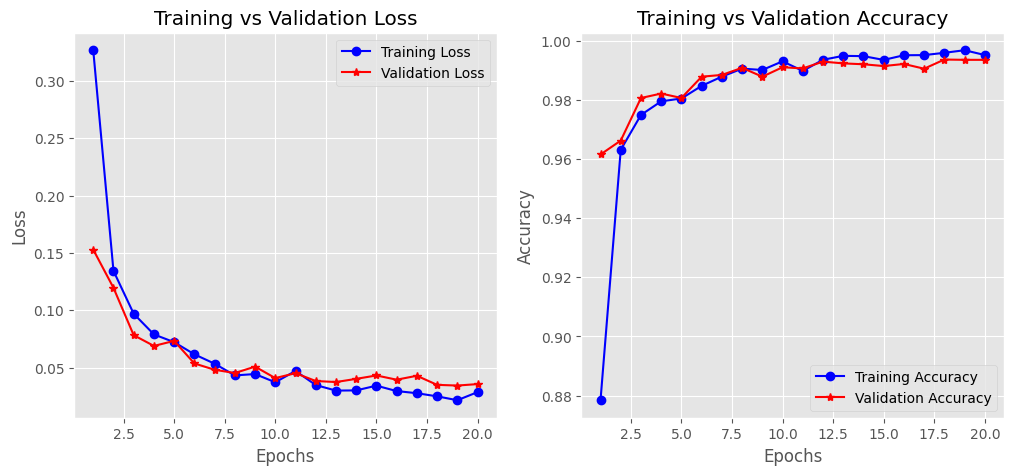

In [30]:
import matplotlib.pyplot as plt

# Extract loss and accuracy from history
epochs = range(1, len(history.history['loss']) + 1)

# ✅ Plot Training & Validation Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# ✅ Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.show()


In [31]:
final_model.fit([X1_train, X2_train], y_train, 
                epochs=20, batch_size=64, 
                validation_data=([X1_test, X2_test], y_test))

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 48ms/step - accuracy: 0.9976 - loss: 0.0189 - val_accuracy: 0.9947 - val_loss: 0.0297
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.9955 - loss: 0.0273 - val_accuracy: 0.9928 - val_loss: 0.0423
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.9966 - loss: 0.0269 - val_accuracy: 0.9945 - val_loss: 0.0312
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.9977 - loss: 0.0183 - val_accuracy: 0.9942 - val_loss: 0.0311
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.9978 - loss: 0.0186 - val_accuracy: 0.9939 - val_loss: 0.0334
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.9979 - loss: 0.0163 - val_accuracy: 0.9929 - val_loss: 0.0382
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.9960 - loss: 0.0266 - val_accuracy: 0.9896 - val_loss: 0.0489
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.9925 - loss: 0.0378 - 

In [32]:
loss, accuracy = final_model.evaluate([X1_test, X2_test], y_test)
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9961 - loss: 0.0263
Test Accuracy: 0.9958


In [33]:
from sklearn.metrics import classification_report

# ✅ Step 1: Get predictions (probabilities)
y_pred_probs = final_model.predict([X1_test, X2_test])  # Predicts probabilities

# ✅ Step 2: Convert probabilities to class labels (Threshold = 0.5)
y_pred_labels = (y_pred_probs > 0.5).astype(int)  # Convert to binary (0 or 1)

# ✅ Step 3: Compute classification report
report = classification_report(y_test, y_pred_labels, digits=4)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step
              precision    recall  f1-score   support

           0     0.9986    0.9930    0.9958      4984
           1     0.9931    0.9986    0.9958      5016

    accuracy                         0.9958     10000
   macro avg     0.9958    0.9958    0.9958     10000
weighted avg     0.9958    0.9958    0.9958     10000



## Testing

In [34]:
import datasets

# Load full testing dataset (all splits)
test_dataset = datasets.load_dataset("code_x_glue_cc_clone_detection_big_clone_bench", split="test")

# Convert to Pandas DataFrame for easier handling
test_df = test_dataset.to_pandas()

# Save to a single CSV file (optional)
test_df.to_csv("bcb_test.csv", index=False)

print(f"Final Test Dataset Size: {test_df.shape}")
print(test_df.head())

Final Test Dataset Size: (415416, 6)
   id       id1       id2  \
0   0   2381663   4458076   
1   1   3809087  15757836   
2   2   6987642   4921631   
3   3  21316706   4168534   
4   4   4798332   1473212   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [35]:
print(test_df.columns)  # Ensure all expected columns exist
print(test_df.dtypes)   # Check data types
print(test_df.iloc[:5]) # Print first 5 rows clearly

Index(['id', 'id1', 'id2', 'func1', 'func2', 'label'], dtype='object')
id        int32
id1       int32
id2       int32
func1    object
func2    object
label      bool
dtype: object
   id       id1       id2  \
0   0   2381663   4458076   
1   1   3809087  15757836   
2   2   6987642   4921631   
3   3  21316706   4168534   
4   4   4798332   1473212   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [36]:
import pandas as pd
pd.set_option('display.max_colwidth', None)  # Prevent truncation
print(test_df.head(10))

   id       id1       id2  \
0   0   2381663   4458076   
1   1   3809087  15757836   
2   2   6987642   4921631   
3   3  21316706   4168534   
4   4   4798332   1473212   
5   5  19494842  21656668   
6   6  10728243  11562165   
7   7  12537270  17207832   
8   8   4778473   8953394   
9   9  19910627   4716110   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [37]:
print(f"Test Dataset: {test_df.shape}")
print()
print(f"Test Dataset: {test_df.shape}")


Test Dataset: (415416, 6)

Test Dataset: (415416, 6)


In [38]:
# cleaning code
test_df["func1"] = test_df["func1"].apply(clean_code)
test_df["func2"] = test_df["func2"].apply(clean_code)

In [39]:
nRowsRead = 50000 # specify 'None' if want to read whole file
# ner_dataset.csv may have more rows in reality, but we are only loading/previewing the first 5000 rows
df_test = pd.read_csv("bcb_test.csv", delimiter=',', nrows = nRowsRead, encoding='utf-8')
nRow, nCol = df_test.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 50000 rows and 6 columns


In [40]:
import pandas as pd
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Load Your New Test Dataset
nRowsRead = 5000 # specify 'None' if want to read whole file
df_test = pd.read_csv("bcb_test.csv", delimiter=',', nrows = nRowsRead, encoding='utf-8')  # Replace with actual file

# Step 2: Tokenize Code Snippets
df_test["func1_tokens"] = df_test["func1"].apply(word_tokenize)
df_test["func2_tokens"] = df_test["func2"].apply(word_tokenize)

# Step 3: Convert Tokens to Word Indices
def text_to_indices(text, model, vocab):
    tokens = word_tokenize(text)
    return [model.wv.key_to_index[word] for word in tokens if word in vocab]

# Load your trained Word2Vec model
word2vec_model = gensim.models.Word2Vec.load("word2vec_bcb.model")

vocab = set(word2vec_model.wv.key_to_index.keys())

df_test["func1_indices"] = df_test["func1"].apply(lambda x: text_to_indices(x, word2vec_model, vocab))
df_test["func2_indices"] = df_test["func2"].apply(lambda x: text_to_indices(x, word2vec_model, vocab))

# Step 4: Apply Padding
MAX_SEQ_LENGTH = 200  # Ensure this matches the training phase
X1_test_new = pad_sequences(df_test["func1_indices"], maxlen=MAX_SEQ_LENGTH, padding="post")
X2_test_new = pad_sequences(df_test["func2_indices"], maxlen=MAX_SEQ_LENGTH, padding="post")

# Step 5: Get True Labels
y_test_new = df_test["label"].astype(int)  # Ensure labels are in integer format

# Step 6: Make Predictions
y_preds = final_model.predict([X1_test_new, X2_test_new])

# Step 7: Convert Predictions to Binary Labels
y_preds_binary = (y_preds > 0.5).astype(int).flatten()

# Step 8: Evaluate Model Performance
print("Classification Report:")
print(classification_report(y_test_new, y_preds_binary))

print(f"Test Accuracy: {accuracy_score(y_test_new, y_preds_binary):.4f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test_new, y_preds_binary))


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4320
           1       0.87      0.94      0.90       680

    accuracy                           0.97      5000
   macro avg       0.93      0.96      0.94      5000
weighted avg       0.97      0.97      0.97      5000

Test Accuracy: 0.9718
Confusion Matrix:
[[4223   97]
 [  44  636]]


In [41]:
# Save the model
final_model.save('/kaggle/working/CCD-Attention.h5')